## Week 5 Homework

In this homework we'll put what we learned about Spark in practice.

For this homework we will be using the FHV 2019-10 data found here. [FHV Data](https://github.com/DataTalksClub/nyc-tlc-data/releases/download/fhv/fhv_tripdata_2019-10.csv.gz)

## Question 1:

Install Spark and PySpark

- Install Spark
- Run PySpark
- Create a local spark session
- Execute spark.version.

What's the output?

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [3]:
spark = SparkSession.builder \
    .master('local[*]') \
    .appName('test') \
    .getOrCreate()

24/03/04 21:23:05 WARN Utils: Your hostname, DESKTOP-87NE6FD resolves to a loopback address: 127.0.1.1; using 172.28.197.143 instead (on interface eth0)
24/03/04 21:23:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


24/03/04 21:23:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [10]:
spark.version

'3.3.2'

### Answer:
- 3.3.2

## Question 2:
    
FHV October 2019

Read the October 2019 FHV into a Spark Dataframe with a schema as we did in the lessons.

Repartition the Dataframe to 6 partitions and save it to parquet.

What is the average size of the Parquet (ending with .parquet extension) Files that were created (in MB)? Select the answer which most closely matches.

- 1MB
- 6MB
- 25MB
- 87MB

In [6]:
df_fhv = spark.read \
    .option("header", "true") \
    .csv('data/hw_data/fhv_tripdata_2019-10.csv.gz')

In [9]:
df_fhv.show()

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|         264|         264|   null|                B00009|
|              B00013|2019-10-01 00:11:29|2019-10-01 00:13:22|         264|         264|   null|                B00013|
|              B00014|2019-10-01 00:11:43|2019-10-01 00:37:20|         264|         264|   null|                B00014|
|              B00014|2019-10-01 00:56:29|2019-10-01 00:57:47|         264|         264|   null|                B00014|
|              B00014|2019-10-01 00:23:09|2019-10-01 00:28:27|         264|         264|   null|                B00014|
|     B00021         |2019-10-01 00:00:4

In [11]:
df_fhv.schema

StructType([StructField('dispatching_base_num', StringType(), True), StructField('pickup_datetime', StringType(), True), StructField('dropOff_datetime', StringType(), True), StructField('PUlocationID', StringType(), True), StructField('DOlocationID', StringType(), True), StructField('SR_Flag', StringType(), True), StructField('Affiliated_base_number', StringType(), True)])

In [12]:
df_fhv.printSchema()

root
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: string (nullable = true)
 |-- dropOff_datetime: string (nullable = true)
 |-- PUlocationID: string (nullable = true)
 |-- DOlocationID: string (nullable = true)
 |-- SR_Flag: string (nullable = true)
 |-- Affiliated_base_number: string (nullable = true)



#### asking help from pandas

In [20]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

In [21]:
df_fhv_pd = pd.read_csv("data/hw_data/fhv_tripdata_2019-10.csv.gz")

In [22]:
df_fhv_pd

,dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number
0,B00009,2019-10-01 00:23:00,2019-10-01 00:35:00,264.0,264.0,NaN,B00009
1,B00013,2019-10-01 00:11:29,2019-10-01 00:13:22,264.0,264.0,NaN,B00013
2,B00014,2019-10-01 00:11:43,2019-10-01 00:37:20,264.0,264.0,NaN,B00014
3,B00014,2019-10-01 00:56:29,2019-10-01 00:57:47,264.0,264.0,NaN,B00014
4,B00014,2019-10-01 00:23:09,2019-10-01 00:28:27,264.0,264.0,NaN,B00014
...,...,...,...,...,...,...,...
1897488,B03160,2019-10-31 23:38:00,2019-10-31 23:48:00,242.0,81.0,NaN,B02887
1897489,B03160,2019-10-31 23:11:00,2019-10-31 23:43:00,161.0,28.0,NaN,B02883
1897490,B03160,2019-10-31 23:13:00,2019-10-31 23:41:00,168.0,215.0,NaN,B02883
1897491,B03186,2019-10-31 23:02:32,2019-10-31 23:09:53,264.0,119.0,NaN,B03186


In [23]:
df_fhv_pd.dtypes

dispatching_base_num       object
pickup_datetime            object
dropOff_datetime           object
PUlocationID              float64
DOlocationID              float64
SR_Flag                   float64
Affiliated_base_number     object
dtype: object

In [33]:
df_fhv_pd['pickup_datetime'] = pd.to_datetime(df_fhv_pd['pickup_datetime'])
df_fhv_pd['dropOff_datetime'] = pd.to_datetime(df_fhv_pd['dropOff_datetime'])

#### create spark dataframe by using pandas dataframe

In [25]:
from pyspark.sql import types

we get an error. so let's set a schema 

In [34]:
schema = schema = types.StructType([
    types.StructField("dispatching_base_num", types.StringType(), True),
    types.StructField("pickup_datetime", types.TimestampType(), True),
    types.StructField("dropOff_datetime", types.TimestampType(), True),
    types.StructField("PUlocationID", types.DoubleType(), True),
    types.StructField("DOlocationID", types.DoubleType(), True),
    types.StructField("SR_Flag", types.DoubleType(), True),
    types.StructField("Affiliated_base_number", types.StringType(), True)
])

In [35]:
spark.createDataFrame(df_fhv_pd, schema=schema)

DataFrame[dispatching_base_num: string, pickup_datetime: timestamp, dropOff_datetime: timestamp, PUlocationID: double, DOlocationID: double, SR_Flag: double, Affiliated_base_number: string]

In [39]:
df_fhv = spark.read \
        .option("header", "true") \
        .schema(schema) \
        .csv('data/hw_data/fhv_tripdata_2019-10.csv.gz')

In [41]:
df_fhv.printSchema()

root
 |-- dispatching_base_num: string (nullable = true)
 |-- pickup_datetime: timestamp (nullable = true)
 |-- dropOff_datetime: timestamp (nullable = true)
 |-- PUlocationID: double (nullable = true)
 |-- DOlocationID: double (nullable = true)
 |-- SR_Flag: double (nullable = true)
 |-- Affiliated_base_number: string (nullable = true)



#### save to parquet

In [42]:
df_fhv \
    .repartition(6) \
    .write.parquet('data/hw_data/hw_data_parquet')

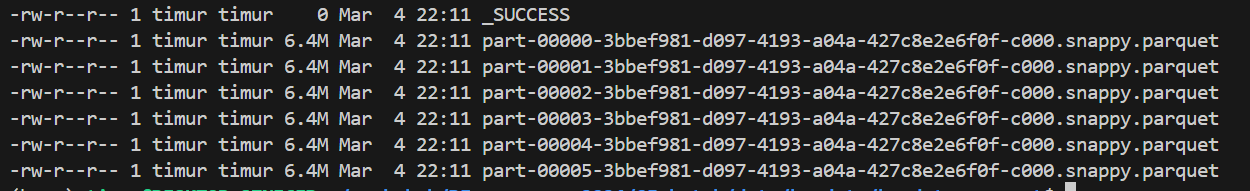

### Answer:
- 6MB

## Question 3:
Count records

How many taxi trips were there on the 15th of October?

Consider only trips that started on the 15th of October.

- 108,164
- 12,856
- 452,470
- 62,610

In [43]:
df_fhv.show()

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|       264.0|       264.0|   null|                B00009|
|              B00013|2019-10-01 00:11:29|2019-10-01 00:13:22|       264.0|       264.0|   null|                B00013|
|              B00014|2019-10-01 00:11:43|2019-10-01 00:37:20|       264.0|       264.0|   null|                B00014|
|              B00014|2019-10-01 00:56:29|2019-10-01 00:57:47|       264.0|       264.0|   null|                B00014|
|              B00014|2019-10-01 00:23:09|2019-10-01 00:28:27|       264.0|       264.0|   null|                B00014|
|     B00021         |2019-10-01 00:00:4

#### register a table

In [46]:
df_fhv.registerTempTable('df_fhv')

/home/timur/spark/spark-3.3.2-bin-hadoop3/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [47]:
spark.sql("""
SELECT 
    count(1)
FROM
    df_fhv 
WHERE 
    DATE(pickup_datetime) = '2019-10-15'
""").show()

+--------+
|count(1)|
+--------+
|   62610|
+--------+



### Answer:
- 62,610

## Question 4:

Longest trip for each day

What is the length of the longest trip in the dataset in hours?

- 631,152.50 Hours
- 243.44 Hours
- 7.68 Hours
- 3.32 Hours

In [50]:
spark.sql("""
SELECT 
    ((dropOff_datetime - pickup_datetime)/60) AS trip_time
FROM
    df_fhv 
ORDER BY 
    trip_time DESC
""").show()

+--------------------+
|           trip_time|
+--------------------+
|INTERVAL '438 07:...|
|INTERVAL '438 07:...|
|INTERVAL '60 21:1...|
|INTERVAL '48 16:4...|
|INTERVAL '6 02:34...|
|INTERVAL '6 02:24...|
|INTERVAL '1 00:24...|
|INTERVAL '0 17:36...|
|INTERVAL '0 17:36...|
|INTERVAL '0 13:13...|
|INTERVAL '0 13:13...|
|INTERVAL '0 13:13...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
|INTERVAL '0 13:12...|
+--------------------+
only showing top 20 rows



In [51]:
spark.sql("""
SELECT 
    MAX(TIMESTAMPDIFF(HOUR, pickup_datetime, dropOff_datetime)) AS longest_trip_hours
FROM 
    df_fhv 
""").show()

+------------------+
|longest_trip_hours|
+------------------+
|            631152|
+------------------+



### Answer: 

- 631,152.50 Hours

## Question 5:

User Interface

Spark’s User Interface which shows the application's dashboard runs on which local port?

- 80
- 443
- 4040
- 8080

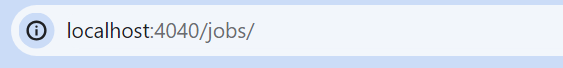

### Answer: 
- 4040

## Question 6:

Least frequent pickup location zone

Load the zone lookup data into a temp view in Spark
[Zone Data](https://github.com/DataTalksClub/nyc-tlc-data/releases/download/misc/taxi_zone_lookup.csv)

Using the zone lookup data and the FHV October 2019 data, what is the name of the LEAST frequent pickup location Zone?

- East Chelsea
- Jamaica Bay
- Union Sq
- Crown Heights North

In [58]:
zone_data_df = spark.read.format("csv").option("header", "true").load("data/hw_data/taxi_zone_lookup.csv")

In [59]:
zone_data_df.show()

+----------+-------------+--------------------+------------+
|LocationID|      Borough|                Zone|service_zone|
+----------+-------------+--------------------+------------+
|         1|          EWR|      Newark Airport|         EWR|
|         2|       Queens|         Jamaica Bay|   Boro Zone|
|         3|        Bronx|Allerton/Pelham G...|   Boro Zone|
|         4|    Manhattan|       Alphabet City| Yellow Zone|
|         5|Staten Island|       Arden Heights|   Boro Zone|
|         6|Staten Island|Arrochar/Fort Wad...|   Boro Zone|
|         7|       Queens|             Astoria|   Boro Zone|
|         8|       Queens|        Astoria Park|   Boro Zone|
|         9|       Queens|          Auburndale|   Boro Zone|
|        10|       Queens|        Baisley Park|   Boro Zone|
|        11|     Brooklyn|          Bath Beach|   Boro Zone|
|        12|    Manhattan|        Battery Park| Yellow Zone|
|        13|    Manhattan|   Battery Park City| Yellow Zone|
|        14|     Brookly

In [60]:
df_fhv.show()

+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|dispatching_base_num|    pickup_datetime|   dropOff_datetime|PUlocationID|DOlocationID|SR_Flag|Affiliated_base_number|
+--------------------+-------------------+-------------------+------------+------------+-------+----------------------+
|              B00009|2019-10-01 00:23:00|2019-10-01 00:35:00|       264.0|       264.0|   null|                B00009|
|              B00013|2019-10-01 00:11:29|2019-10-01 00:13:22|       264.0|       264.0|   null|                B00013|
|              B00014|2019-10-01 00:11:43|2019-10-01 00:37:20|       264.0|       264.0|   null|                B00014|
|              B00014|2019-10-01 00:56:29|2019-10-01 00:57:47|       264.0|       264.0|   null|                B00014|
|              B00014|2019-10-01 00:23:09|2019-10-01 00:28:27|       264.0|       264.0|   null|                B00014|
|     B00021         |2019-10-01 00:00:4

In [63]:
zone_data_df.createOrReplaceTempView("zone_data_df")

# Выполнение SQL-запроса
spark.sql('''
SELECT
    zone_data_df.Zone,
    COUNT(*) AS frequency
FROM
    zone_data_df
JOIN
    df_fhv ON df_fhv.PUlocationID = zone_data_df.LocationID
GROUP BY
    zone_data_df.Zone
ORDER BY
    frequency ASC
LIMIT 1
''').show()

+-----------+---------+
|       Zone|frequency|
+-----------+---------+
|Jamaica Bay|        1|
+-----------+---------+



### Answer: 
- Jamaica Bay